## Загрузка данных

In [104]:
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.scorer import make_scorer
from sklearn.dummy import DummyRegressor

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style='darkgrid', rc={'figure.figsize':(15,10)})

In [106]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [107]:
print(df_train.shape)
print(df_test.shape)
print(df_full.shape)

(14149, 87)
(5290, 53)
(19439, 87)


In [108]:
df_train.isna().mean().apply('{:.2%}'.format)

date                                                   0.00%
final.output.concentrate_ag                            0.01%
final.output.concentrate_pb                            0.01%
final.output.concentrate_sol                           1.49%
final.output.concentrate_au                            0.00%
final.output.recovery                                  0.00%
final.output.tail_ag                                   0.00%
final.output.tail_pb                                   0.71%
final.output.tail_sol                                  0.04%
final.output.tail_au                                   0.00%
primary_cleaner.input.sulfate                          0.14%
primary_cleaner.input.depressant                       0.23%
primary_cleaner.input.feed_size                        0.00%
primary_cleaner.input.xanthate                         0.71%
primary_cleaner.output.concentrate_ag                  0.00%
primary_cleaner.output.concentrate_pb                  0.61%
primary_cleaner.output.c

In [109]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

In [110]:
df_test.isna().mean().apply('{:.2%}'.format)

date                                          0.00%
primary_cleaner.input.sulfate                 0.08%
primary_cleaner.input.depressant              0.09%
primary_cleaner.input.feed_size               0.00%
primary_cleaner.input.xanthate                0.08%
primary_cleaner.state.floatbank8_a_air        0.00%
primary_cleaner.state.floatbank8_a_level      0.00%
primary_cleaner.state.floatbank8_b_air        0.00%
primary_cleaner.state.floatbank8_b_level      0.00%
primary_cleaner.state.floatbank8_c_air        0.00%
primary_cleaner.state.floatbank8_c_level      0.00%
primary_cleaner.state.floatbank8_d_air        0.00%
primary_cleaner.state.floatbank8_d_level      0.00%
rougher.input.feed_ag                         0.00%
rougher.input.feed_pb                         0.00%
rougher.input.feed_rate                       0.06%
rougher.input.feed_size                       0.02%
rougher.input.feed_sol                        0.40%
rougher.input.feed_au                         0.00%
rougher.inpu

In [111]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

In [112]:
df_full.isna().mean().apply('{:.2%}'.format)

date                                                  0.00%
final.output.concentrate_ag                           0.01%
final.output.concentrate_pb                           0.01%
final.output.concentrate_sol                          1.09%
final.output.concentrate_au                           0.00%
final.output.recovery                                 0.00%
final.output.tail_ag                                  0.01%
final.output.tail_pb                                  0.52%
final.output.tail_sol                                 0.03%
final.output.tail_au                                  0.00%
primary_cleaner.input.sulfate                         0.12%
primary_cleaner.input.depressant                      0.19%
primary_cleaner.input.feed_size                       0.00%
primary_cleaner.input.xanthate                        0.54%
primary_cleaner.output.concentrate_ag                 0.00%
primary_cleaner.output.concentrate_pb                 0.60%
primary_cleaner.output.concentrate_sol  

In [113]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

In [114]:
df_train.sample(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
13230,2018-06-29 09:59:59,4.298146,10.429581,7.134357,45.992769,72.079813,8.072803,2.480298,11.129368,2.598292,168.701743,6.938257,7.270000,1.522429,7.084072,10.975730,7.635984,31.984476,16.764676,3.908692,6.722117,3.720765,1697.079532,-500.504285,1698.540633,-499.746050,1697.889360,-500.708513,1698.147966,-498.379029,40925.227158,2806.200245,2804.425009,1.960250,7.020713,4.143164,627.129104,76.325314,41.501743,8.121636,14.002322,6.414032,13.996272,6.438031,10.111933,9.047266,26.822477,17.127904,82.597553,5.380330,1.007616,19.341381,2.323302,1000.967778,-299.939398,1199.402723,-500.009558,1200.366859,-500.217010,1098.064907,-503.224021,997.569405,-500.814675,997.453546,-500.902117,17.012199,9.574160,0.869082,3.323211,35.012127,-499.545837,32.997963,-499.624132,35.982083,-500.069897,27.964516,-499.971776,29.971475,-500.082045,22.983517,-499.558357,19.967570,-501.090893,14.991423,-500.195285,17.983093,-500.962130
8146,2017-06-21 10:59:59,4.527056,10.204242,7.964243,46.117376,62.453166,7.940680,2.967309,10.201274,2.709342,124.706608,8.938340,7.153333,1.068744

In [115]:
df_test.sample(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
1416,2016-11-09 17:59:59,192.866392,4.930660,7.38,0.906295,1603.874606,-500.928371,1600.169561,-500.870603,1598.993610,-502.452359,1600.424831,-499.792300,8.732867,2.678146,515.972838,50.855392,41.702603,8.405598,12.219997,7.000649,12.221706,6.999331,997.766582,-350.140190,1596.916434,-400.408942,1598.442515,-400.230300,1512.407799,-399.537527,1300.341652,-399.892374,1201.195980,-401.224473,25.027187,-499.657137,22.014748,-500.352636,29.953162,-500.153737,27.018282,-499.846952,15.988790,-498.651845,13.983872,-500.180508,15.702814,-498.344530,13.980823,-499.562039,21.999464,-500.563744
5119,2017-12-23 13:59:59,214.187115,14.969463,7.70,1.315769,1601.597101,-499.886454,1600.807733,-497.171956,1381.343430,-496.718358,1602.445846,-499.459174,12.635195,5.327125,521.779924,42.364315,41.293831,11.588938,13.451568,7.303569,13.455926,7.303849,1374.387463,-299.997215,1203.437506,-498.854121,1102.668296,-499.152403,1013.197139,-495.605945,901.002920,-499.118846,901.934304,-496.585800,26.951218,-499.880411,24.932807,-500.096907,26.041864,-500.225008,20.985014,-499.909570,20.020657,-499.414120,15.088769,-499.376983,11.006966,-498.993014,8.217585,-500.093506,12.030446,-498.480044
3622,2017-10-19 02:59:59,242.037266,9.245368,6.20,2.832173,1700.558059,-499.857155,1700.260464,-502.110035,1667.001204,-499.783295,1699.518954,-501.388121,9.575193,5.639835,510.137357,53.182393,39.501122,11.216925,15.996600,7.087629,15.998891,7.055626,996.846271,-299.884565,1095.346524,-500.446657,1049.515129,-500.292864,999.304628,-500.078878,900.305557,-500.082887,899.806859,-499.546975,27.939617,-499.799023,25.989050,-499.677579,25.009976,-499.831593,23.022624,-500.155647,18.032178,-499.666317,15.970935,-399.893429,12.927787,-499.705761,9.964422,-500.137739,13.990667,-500.282263


In [116]:
df_full.sample(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
6980,2016-12-17 19:59:59,6.216032,9.453623,13.432703,43.110024,72.504366,11.565029,3.333350,7.937782,3.198657,201.313758,10.960042,7.30,1.300091,9.827448,10.470065,12.467483,31.680749,16.861398,3.614550,9.787842,3.033033,1497.446145,-500.430756,1500.361673,-502.007586,1504.006021,-502.566052,1501.025568,-498.729334,58070.492038,3516.754955,3517.570194,2.479463,10.331809,3.924105,382.512194,42.856016,34.360963,9.729672,13.999419,6.000439,14.007342,5.998803,14.483617,7.744754,31.533319,20.531375,87.861936,6.718265,0.516335,17.690339,2.023537,1001.984370,-500.261172,1400.710037,-499.980303,1401.167486,-501.484208,1409.635280,-480.482178,1051.603834,-513.929315,950.769514,-500.052098,15.759008,3.708585,12.362864,2.580440,26.994537,-500.056145,22.914987,-500.158233,30.056782,-500.700742,27.012961,-500.102075,17.020794,-499.680216,14.935028,-495.789892,17.842793,-501.871111,11.962073,-500.268149,20.993183,-501.104705
6921,2016-12-15 08:59:59,4.979646,9.348924,13.081245,45.286122,75.233834,11.510651,3.167248,7.637588,2.957874,182.215534,11.933614,6.48,0.999574,9.

Видим наличие пропусков в различных колонках датафреймов  
Заменим пропущенные в каждой колонке значения на медиану в этой колонке

In [117]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

Создадим функцию для проверки правильности вычисления эффективности обогащения

In [118]:
def check_recovery(row):
    value = row['rougher.output.concentrate_au'] * (row['rougher.input.feed_au'] - row['rougher.output.tail_au']) / (row['rougher.input.feed_au'] * (row['rougher.output.concentrate_au'] - row['rougher.output.tail_au'])) * 100
    return value

In [119]:
df_train['rougher.output.recovery.check'] = df_train.apply(check_recovery, axis=1)

Посчитаем метрику MAE для найденных значений и значений признака

In [120]:
print(mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.recovery.check']))
df_train.drop(['rougher.output.recovery.check'], axis=1, inplace=True)

9.682896147825551e-15


Видим, что значение метрики очень близко к нулю. Можно сделать вывод, что значение признака рассчитано верно

Проанализируем признаки, которых нет в тестовой выборке

In [121]:
columns = df_test.columns
features = df_train[df_train.columns[~df_train.columns.isin(columns)]]
features.sample(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
1980,10.277428,10.105178,12.005653,36.959431,64.455860,13.814040,4.004709,7.572289,6.022856,11.900652,6.649571,14.933931,29.331784,19.114129,4.529604,6.168855,6.416355,60031.143821,2605.133843,2606.973964,2.420146,15.795185,8.331598,35.247806,24.113989,86.068536,7.359756,0.037015,65.617188,3.417701,17.547423,5.306375,9.029098,5.379372
483,4.714926,10.184591,3.681932,44.993736,67.490626,10.746677,1.336641,16.370530,2.083089,7.440257,9.077696,14.583495,38.535217,15.244567,2.765577,7.688744,2.201790,41991.284817,3099.319745,3103.710197,2.776426,12.061119,7.502499,27.900926,18.850979,77.554253,4.748104,0.657579,19.956207,1.727625,13.442444,5.044598,10.616266,2.902355
11232,4.235709,11.785050,8.165633,45.855660,69.644892,9.379394,2.512065,7.752680,2.648996,6.483117,12.193054,7.638422,35.497694,20.102049,4.831343,5.036610,3.098467,37920.045985,2512.435246,2512.308194,1.874474,9.903325,8.694992,27.903104,19.667117,87.981827,4.676098,0.837927,16.198284,1.413182,16.730183,10.392563,0.419274,4.903454


Все признаки, отсутствующие в тестовой выборке представляют собой данные о концентрации различных веществ на следующих этапах:
 * Концентрация веществ в финальном продукте
 * Содержание веществ в отвальных хвостах на финальной стадии
 * Концентрация веществ в продукте после первичной очистки 
 * Расчетные характеристики соотношения концентраций для стадии флотации
 * Концентрация веществ после флотации
 * Содержание веществ в отвальных хвостах после флотации
 * Размеры исходного сырья подаваемого на флотационные установки
 * Значение целевого признака final.output.recovery

## Анализ данных

Посмотрим на полном наборе данных как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Начнем с золота (Au)

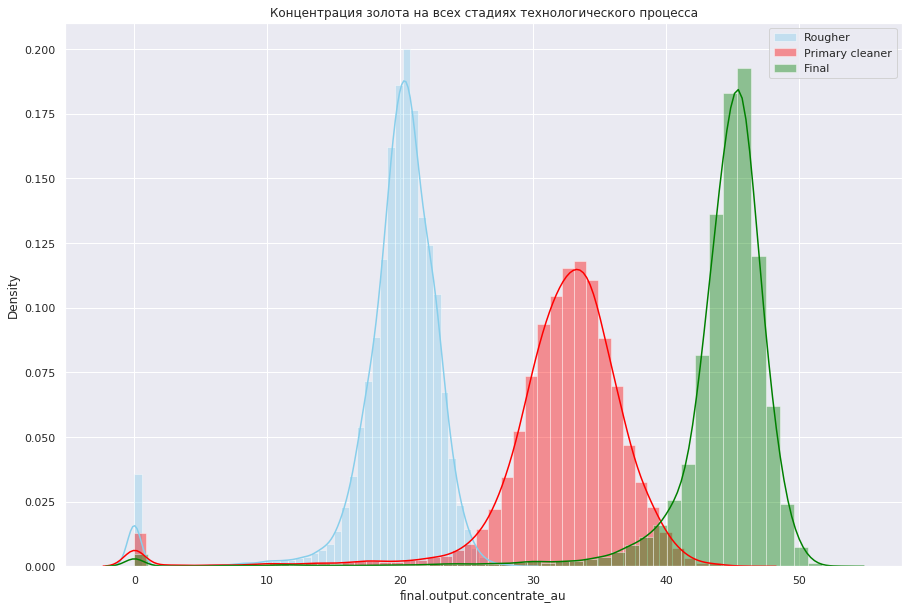

In [122]:
sns.distplot(a=df_full['rougher.output.concentrate_au'], color="skyblue", label="Rougher", kde=True)
sns.distplot(a=df_full['primary_cleaner.output.concentrate_au'], color="red", label="Primary cleaner", kde=True)
sns.distplot(a=df_full['final.output.concentrate_au'], color="green", label="Final", kde=True)
plt.title('Концентрация золота на всех стадиях технологического процесса')
plt.legend()
plt.show()

Видим что с каждым этапом обработки концентрация золота увеличивается

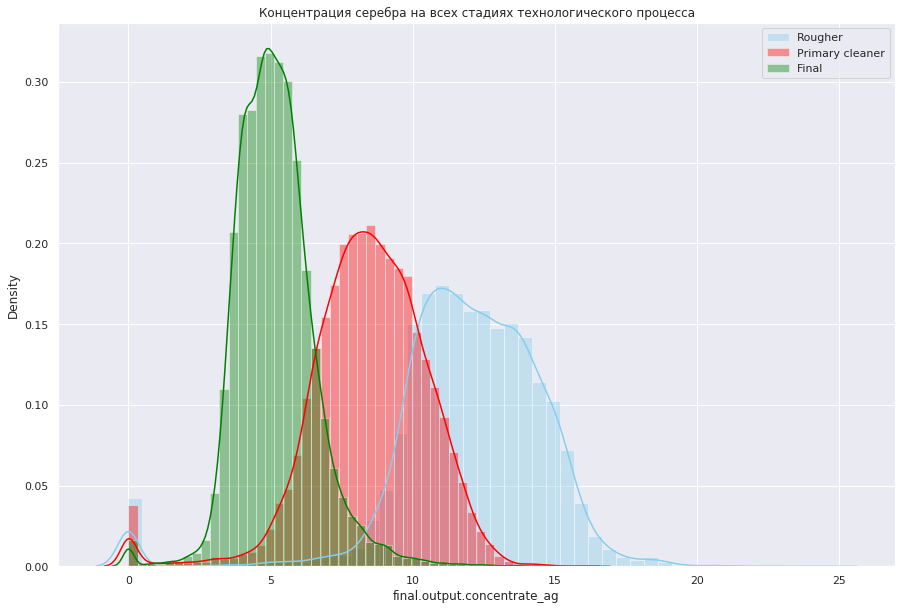

In [123]:
sns.distplot(a=df_full['rougher.output.concentrate_ag'], color="skyblue", label="Rougher", kde=True)
sns.distplot(a=df_full['primary_cleaner.output.concentrate_ag'], color="red", label="Primary cleaner", kde=True)
sns.distplot(a=df_full['final.output.concentrate_ag'], color="green", label="Final", kde=True)
plt.title('Концентрация серебра на всех стадиях технологического процесса')
plt.legend()
plt.show()

Видим что с каждым этапом обработки концентрация серебра уменьшается

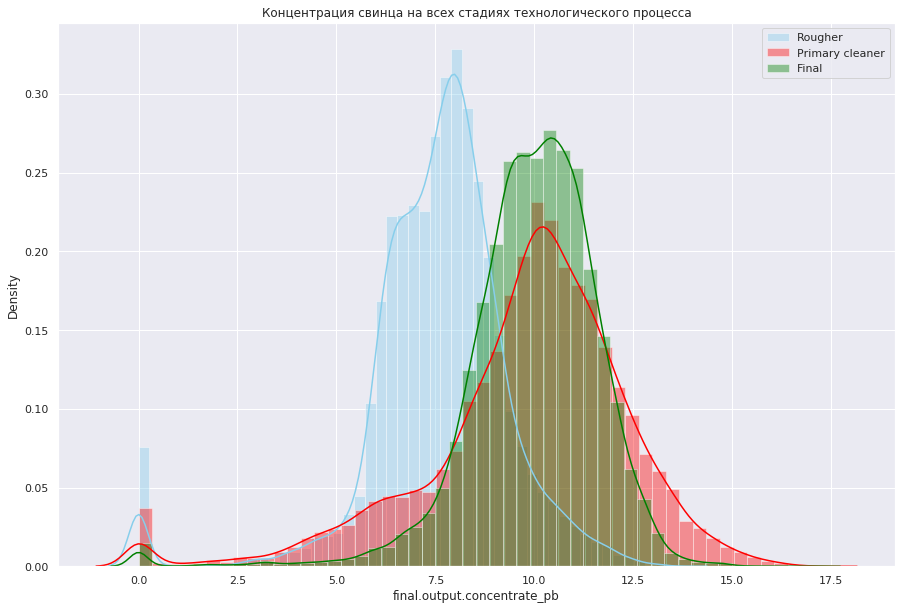

In [124]:
sns.distplot(a=df_full['rougher.output.concentrate_pb'], color="skyblue", label="Rougher", kde=True)
sns.distplot(a=df_full['primary_cleaner.output.concentrate_pb'], color="red", label="Primary cleaner", kde=True)
sns.distplot(a=df_full['final.output.concentrate_pb'], color="green", label="Final", kde=True)
plt.title('Концентрация свинца на всех стадиях технологического процесса')
plt.legend()
plt.show()

Видим что после флотации концентрация свинца уменьшается, а после очистки изменяется не очень сильно

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

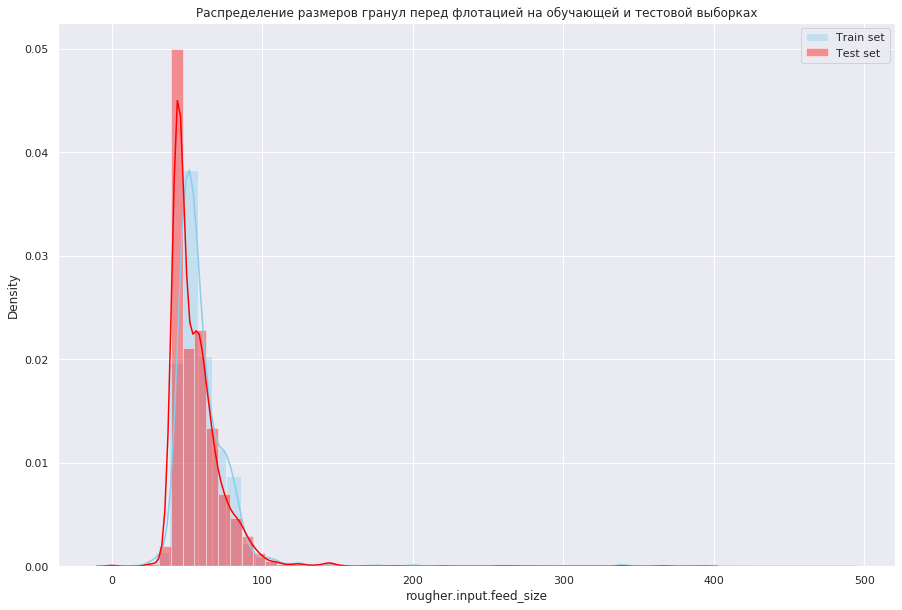

Обучающая выборка:
 Mean: 60.23985599255732 
 Median: 55.269783890501536 

Тестовая выборка:
 Mean: 55.95275402889513 
 Median: 50.8468431600362


In [125]:
sns.distplot(a=df_train['rougher.input.feed_size'], color='skyblue', label='Train set', kde=True)
sns.distplot(a=df_test['rougher.input.feed_size'], color='red', label='Test set', kde=True)
plt.title('Распределение размеров гранул перед флотацией на обучающей и тестовой выборках')
plt.legend()
plt.show()
print('Обучающая выборка:\n', 'Mean:', df_train['rougher.input.feed_size'].mean(), '\n', 'Median:', df_train['rougher.input.feed_size'].median(), '\n')
print('Тестовая выборка:\n', 'Mean:', df_test['rougher.input.feed_size'].mean(), '\n', 'Median:', df_test['rougher.input.feed_size'].median())

Распределения размеров гранул сырья похожи по форме

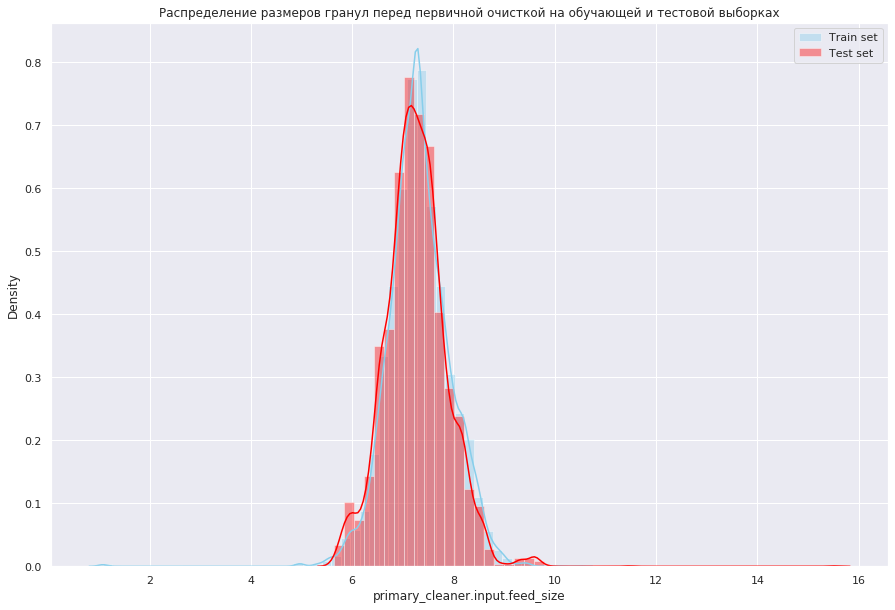

Обучающая выборка:
 Mean: 7.322309906901314 
 Median: 7.289999961853027 

Тестовая выборка:
 Mean: 7.266339191270906 
 Median: 7.25


In [126]:
sns.distplot(a=df_train['primary_cleaner.input.feed_size'], color="skyblue", label="Train set", kde=True)
sns.distplot(a=df_test['primary_cleaner.input.feed_size'], color="red", label="Test set", kde=True)
plt.title('Распределение размеров гранул перед первичной очисткой на обучающей и тестовой выборках')
plt.legend()
plt.show()
print('Обучающая выборка:\n', 'Mean:', df_train['primary_cleaner.input.feed_size'].mean(), '\n', 'Median:', df_train['primary_cleaner.input.feed_size'].median(), '\n')
print('Тестовая выборка:\n', 'Mean:', df_test['primary_cleaner.input.feed_size'].mean(), '\n', 'Median:', df_test['primary_cleaner.input.feed_size'].median())

Распределения размеров гранул сырья похожи по форме

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах  

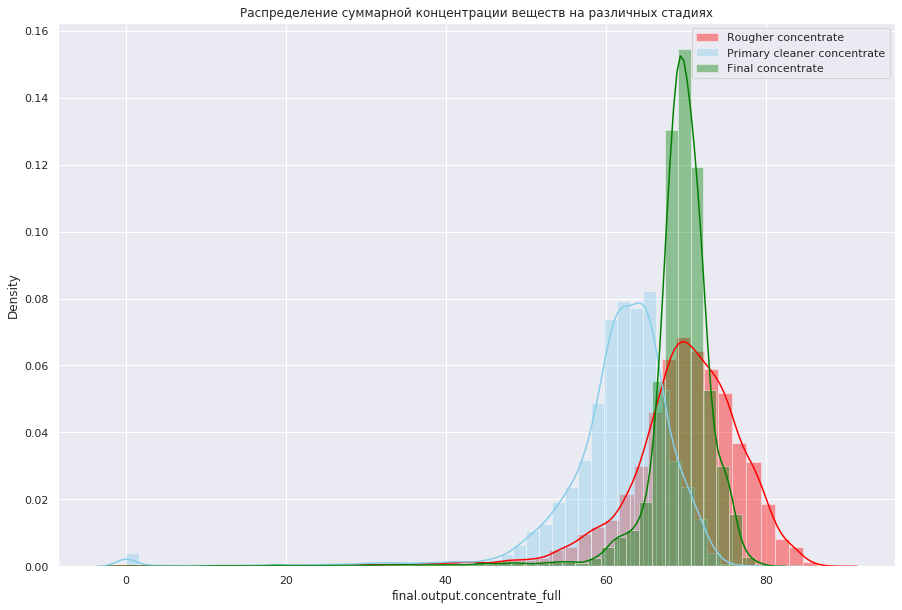

In [127]:
df_full['rougher.output.concentrate_full'] = df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol'] + df_full['rougher.output.concentrate_au']
df_full['primary_cleaner.output.concentrate_full'] = df_full['primary_cleaner.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_sol'] + df_full['primary_cleaner.output.concentrate_au']
df_full['final.output.concentrate_full'] = df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol'] + df_full['final.output.concentrate_au']

df_full = df_full[(df_full["rougher.output.concentrate_full"] > 0) & (df_full['primary_cleaner.output.concentrate_full'] > 0) & (df_full['final.output.concentrate_full'] > 0)]

sns.distplot(a=df_full['rougher.output.concentrate_full'], color="red", label="Rougher concentrate", kde=True)
sns.distplot(a=df_full['primary_cleaner.output.concentrate_full'], color="skyblue", label="Primary cleaner concentrate", kde=True)
sns.distplot(a=df_full['final.output.concentrate_full'], color="green", label="Final concentrate", kde=True)
plt.title('Распределение суммарной концентрации веществ на различных стадиях')
plt.legend()
plt.show()

Видим, что с каждой новой стадией обработки суммарная концентрация веществ снижается

## Модель

Напишем функцию для вычисления итогового значения метрики sMAPE

In [128]:
def final_smape_score(target, predictions):
    predictions = pd.DataFrame(data=predictions)
    smape_rougher = (abs(target['rougher.output.recovery'] - predictions[0]) / ((abs(target['rougher.output.recovery']) + abs(predictions[0])) / 2)).sum() / len(target) * 100
    smape_final = (abs(target['final.output.recovery'] - predictions[1]) / ((abs(target['final.output.recovery']) + abs(predictions[1])) / 2)).sum() / len(target) * 100

    return 0.25 * smape_rougher + 0.75 * smape_final

Подготовим все данные для обучения и тестирования модели

In [129]:
df_train = df_train[df_train['date'].isin(df_full['date'])]

In [130]:
X_train = df_train[columns].drop(['date'], axis=1)
y_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
print(X_train.shape)
print(y_train.shape)

(13725, 52)
(13725, 2)


In [131]:
test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')
X_test = test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
y_test = test[['rougher.output.recovery', 'final.output.recovery']]
print(X_test.shape)
print(y_test.shape)

(5123, 52)
(5123, 2)


Создадим пайплайны с различными моделями.

In [132]:
custom_scorer = make_scorer(final_smape_score, greater_is_better=False)

In [133]:
lr_regressor = LinearRegression()
lr_pipeline = Pipeline(steps=[('regressor', lr_regressor)])

In [134]:
param_grid_dt = [
    {
        'max_depth': [i for i in range(1, 21, 5)],
        'min_samples_split': [i for i in range(2, 20, 2)],
        'min_samples_leaf': [i for i in range(1,21, 2)]
    }
]

In [135]:
dt_regressor = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, scoring=custom_scorer, cv=5)
dt_pipeline = Pipeline(steps=[('classifier', dt_regressor)])

In [136]:
param_grid_rf = [
    {
        'max_depth': [i for i in range(1, 21, 5)],
        'min_samples_split': [i for i in range(2, 20, 5)],
        'min_samples_leaf': [2, 4]
    }
]

In [137]:
rf_regressor = GridSearchCV(RandomForestRegressor(random_state=42, n_estimators=70), param_grid_rf, scoring=custom_scorer, cv=5)
rf_pipeline = Pipeline(steps=[('classifier', rf_regressor)])

Для оценки модели на адекватность используем DummyRegressor со стратегией 'median'

In [138]:
dummy_regressor = DummyRegressor(strategy="median")
dummy_pipeline = Pipeline(steps=[('regressor', dummy_regressor)])

In [139]:
def run_pipelines(pipelines, text_and_score, X_train, y_train, X_test, y_test):
    for idx, value in enumerate(text_and_score):
        pipelines[idx].fit(X_train, y_train)
        pred = pipelines[idx].predict(X_test)
        text_and_score[value][1] = final_smape_score(y_test, pred)
        print('Модель:', text_and_score[value][0])
        print('Метрика Final sMAPE:', text_and_score[value][1])

    return text_and_score

In [140]:
pipelines = [lr_pipeline, dt_pipeline, rf_pipeline, dummy_pipeline]
results = {0: ['Линейная регрессия', 0], 1: ['Дерево решений', 0], 2: ['Случайный лес', 0], 3: ['Dummy regressor', 0]}

In [141]:
results = run_pipelines(pipelines, results, X_train, y_train, X_test, y_test)

Модель: Линейная регрессия
Метрика Final sMAPE: 7.316037194142463
Модель: Дерево решений
Метрика Final sMAPE: 7.234083090941797
Модель: Случайный лес
Метрика Final sMAPE: 7.205498672735592
Модель: Dummy regressor
Метрика Final sMAPE: 7.369167385832511


## Выводы


 * Датасеты содержат небольшой процент пропусков в некоторых колонках
 * Значение признака rougher.output.recovery рассчитано верно
 * Обучающая выборка содержит достаточно много признаков, которых нет в тестовой
 * С каждым следующим этапом обогащения золота концентрация веществ снижается(за исключением вторичной очистки свинца)
 * С каждым следующим этапом обогащения золота концентрация золота увеличивается
 * Распределения размеров гранул сырья на тестовой и обучающей выборках похожи
 * Лучшее значение метрики Final sMAPE с использованием модели Cлучайного леса, и это значение ниже, чем при использовании Dummy regressor